In [37]:
import sys
import glob
import torch
import torchvision
from torchvision import datasets,transforms
from torchvision import datasets
from torchvision.transforms import ToTensor, RandomCrop, RandomVerticalFlip
import cv2
#import numpy as np
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import os
from PIL import Image
import torch.nn as nn



#print(os.path.abspath(pathandname))
topdirpath=os.getcwd()#'현재상위 디렉토리 ~~~/cnntest'
top2dirpath=os.listdir(topdirpath)
print('데이터셋최상위경로',topdirpath)
print('그밑으로 어떤 파일있는지',os.listdir(topdirpath))
dirl=[]#train and label directory list
allsearchdir=[]
for i in top2dirpath:#디렉토리만 건지기위해 .없는것만 생성
    if '.' not in i:
        dirl.append(topdirpath+'/'+i)
    #print(os.walk(i))
print('train과 label의 경로',dirl)

for i in dirl:
    print('folder내의 파일',os.listdir(i))
    for j in os.listdir(i):
        underpath=i+'/'+j
        
        ###############confirmIR#####################
        if 'IR' in os.listdir(underpath): #ir폴더가 있으면 ir폴더의경로까지 추가
            buf=os.listdir(underpath)
            #print(buf)
            additional=underpath+'/'+'IR'
            allsearchdir.append(additional)
        
        allsearchdir.append(underpath)
        
        
#print(allsearchdir)
allsearchdir.sort()
#print(allsearchdir)
print(len(allsearchdir))
labeldirpath=[]
imgdirpath=[]
for i in allsearchdir:#img경로와 label경로 분리
    if 'train' in i:
        imgdirpath.append(i)
    else:
        labeldirpath.append(i)
        
# print('labelpath',labeldirpath)
# print()
# print('imgdirpath',imgdirpath)

# cfrm=os.listdir(imgdirpath[0])
# cfrm.sort()
# print(cfrm)
# cfrm.pop(-1)
# print(cfrm)
        
    

데이터셋최상위경로 /home/keti2/cnntest/data
그밑으로 어떤 파일있는지 ['.ipynb_checkpoints', 'dtset_train.ipynb', 'train', 'label', 'datasetload.ipynb']
train과 label의 경로 ['/home/keti2/cnntest/data/train', '/home/keti2/cnntest/data/label']
folder내의 파일 ['chuck_ON', 'error_ON', 'start_ON', 'chuck_OFF', 'start_OFF', 'error_OFF']
folder내의 파일 ['chuck_ON', 'error_ON', 'start_ON', 'chuck_OFF', 'start_OFF', 'error_OFF']
24


In [38]:
class CustomImageDataset(Dataset):
    def __init__(self,imgpath,labelpath):
        self.images=[]
        self.labels=[]
        self.clsnums=[]
        
        self.bufimages=[]
        self.transform=transforms.Compose([transforms.Resize((50,50)),transforms.ToTensor()])
        #self.transform=transforms.Compose([transforms.ToTensor()])
        
        for i in imgpath:#img paht listization
            cfrm=[]
            cfrm=os.listdir(i)
            cfrm.sort()
            if 'IR' not in i:
                cfrm.pop(-1)
                
            for j in range(len(cfrm)):#풀경로
                cfrm[j]=i+'/'+cfrm[j]
                
            #self.images.extend(cfrm)
            self.bufimages.append(cfrm)
            
        for i in self.bufimages:
            for j in i:
                self.images.append(j)
        
        
        
            
        for i in labelpath:
            cflm=[]
            cflm=os.listdir(i)
            cflm.sort()
            if 'IR' not in i:
                cflm.pop(-1)
            for j in range(len(cflm)):
                cflm[j]=i+'/'+cflm[j]
            self.labels.extend(cflm)
        #print(self.labels[0])    
        
        
        for i in self.labels:
            qwe=open(i,'r',encoding='utf-8')
            clsnum=int(qwe.read())
            qwe.close()
            self.clsnums.append(clsnum)
            

        
    def __len__(self):
        return len(self.images)

    def __getitem__(self,idx):
        img_path=self.images[idx]
        label=self.clsnums[idx]
        
        imgcv2=cv2.imread(img_path,1)
        img=Image.open(img_path)
        
        new=img.convert(mode='RGB')
        
        imgttt=self.transform(new)
        
       
        #img=self.transform(img)
        
        
        return imgttt,label
        
        
        
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
        #return image, label

In [39]:
dataset=CustomImageDataset(imgpath=imgdirpath,labelpath=labeldirpath)

In [40]:
dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True,drop_last=False)

In [24]:
for a,i in enumerate(dataloader):
    if a == 5:
        break
    print(i)
    print(i[0].size())

[tensor([[[[0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1255, 0.1255],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1176, 0.1176],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1176, 0.1176],
          ...,
          [0.1294, 0.1294, 0.1294,  ..., 0.1255, 0.1216, 0.1216],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1255, 0.1255],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1255, 0.1255]],

         [[0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1255, 0.1255],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1176, 0.1176],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1176, 0.1176],
          ...,
          [0.1294, 0.1294, 0.1294,  ..., 0.1255, 0.1216, 0.1216],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1255, 0.1255],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1255, 0.1255]],

         [[0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1255, 0.1255],
          [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1176, 0.1176],
          [0.1255, 0.1255, 0.1255,  ..., 

In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [42]:
learning_rate=0.001
training_epochs = 15
batch_size = 4


In [51]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)#channel,output,kernel_size /result=46
        self.pool = nn.MaxPool2d(2, 2) #result=23
        self.conv2 = nn.Conv2d(6, 16, 3) #result=20
        self.fc1 = nn.Linear(16 * 10* 10, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

print('cnn declaration complete')

cnn declaration complete


In [54]:
model= Net().to(device)

criterion=torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
print('cnn declaration complete')

cnn declaration complete


In [55]:
# loss_arr=[]
# for i in range(training_epochs):
#     for j,[image,label] in enumerate(dataloader):
#         x=image.to(device)
#         y=label.to(device)
        
#         optimizer.zero_grad()
        
#         output=model.forward(x)
        
#         loss=loss_func(output,y)
        
        
#         loss.backward()
#         optimizer.step()
        
#         if j % 500 == 0:
#             print(loss)
#             loss_arr.append(loss.cpu().detach().numpy())
#             #gpu에 있는 연산기록으로 부터 분리한 tensor를 cpu에 넣는것
#             #gpu메모리에 올려져있는 tensor를 numpy로 변환하기위해선 cpu 메모리로 옮겨야 하기 떄문이다.


for epoch in range(training_epochs):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(dataloader):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        
        #get the inputs
        inputs = inputs.to(torch.device('cuda'))
        labels=labels.to(torch.device('cuda'))
        
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


Finished Training


In [57]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

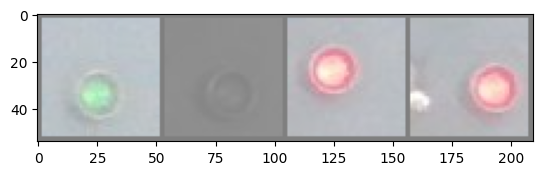

tensor(1)
tensor(2)
tensor(3)
tensor(3)


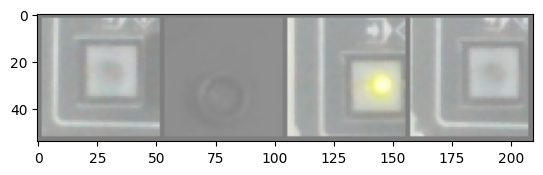

tensor(4)
tensor(2)
tensor(5)
tensor(4)
end


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(dataloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
for j in range(batch_size):
    print(labels[j])



dataiter = iter(dataloader)
images, labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
for j in range(batch_size):
    print(labels[j])
print('end')
#print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))